In [41]:
import torch as tr
import numpy as np

import itertools

from PM_models import *
from PM_tasks import *
from help_amtask import *

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
seed = 0 
nmaps = 4
switch = 1
task = TaskArbitraryMaps(nmaps,seed=seed,switchmaps=switch)
stsize = 6
seed = 0
net = NetFFN(stsize=stsize,seed=seed)
net.emk_weights = [1,0.5]

In [55]:
# train params
neps_tr = 1000
trlen_tr = 2
ntrials_tr = 2
trsc = run_net(net,task,neps_tr,ntrials_tr,trlen_tr,training=True,verb=True,return_states=False)
trsc.shape

0.0 0.16666666666666666
0.2 0.75
0.4 0.8333333333333334
0.6 0.8333333333333334
0.8 0.75


(1000, 2, 6)

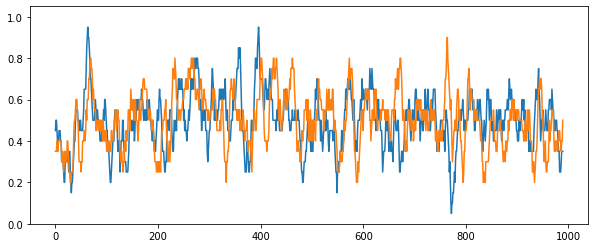

In [56]:
plt.figure(figsize=(10,4))
trac = trsc[:,:,nmaps:].mean(2)
for t in trac.T:
  plt.plot(mov_avg(t,10))
plt.ylim(0,1.05)
plt.savefig('figures/amtask-ffnn/train_acc_emkw%.4f.png'%net.emk_weights[1])
